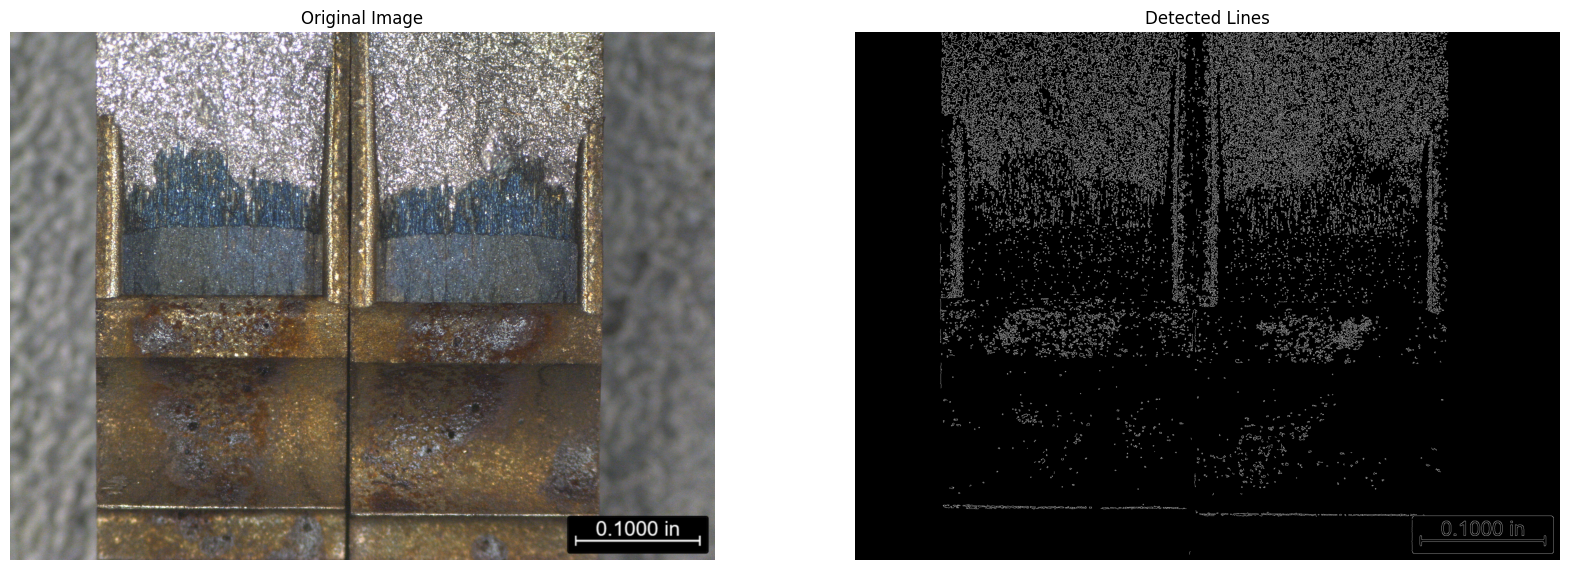

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lines(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply edge detection
    edges = cv2.Canny(gray, 100, 200)
    # Detect lines using Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)
    return lines

def method2(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Blur the image for better edge detection
    # img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
    img_blur = cv2.bilateralFilter(img_gray, 2, 50, 50)
    # Canny Edge Detection
    edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
    return edges

path = "sample.jpg"
image = cv2.imread(path)
# lines = detect_lines(image)
lines = method2(image)

# Display the original image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# # Create an image to draw the lines on
# line_image = np.copy(image) * 0

# if lines is not None:
#     for line in lines:
#         for x1, y1, x2, y2 in line:
#             cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

# Combine the original image with the line image
# combo_image = cv2.addWeighted(image, 0.8, lines, 1, 0)

# Display the image with lines
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(lines, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')

plt.show()

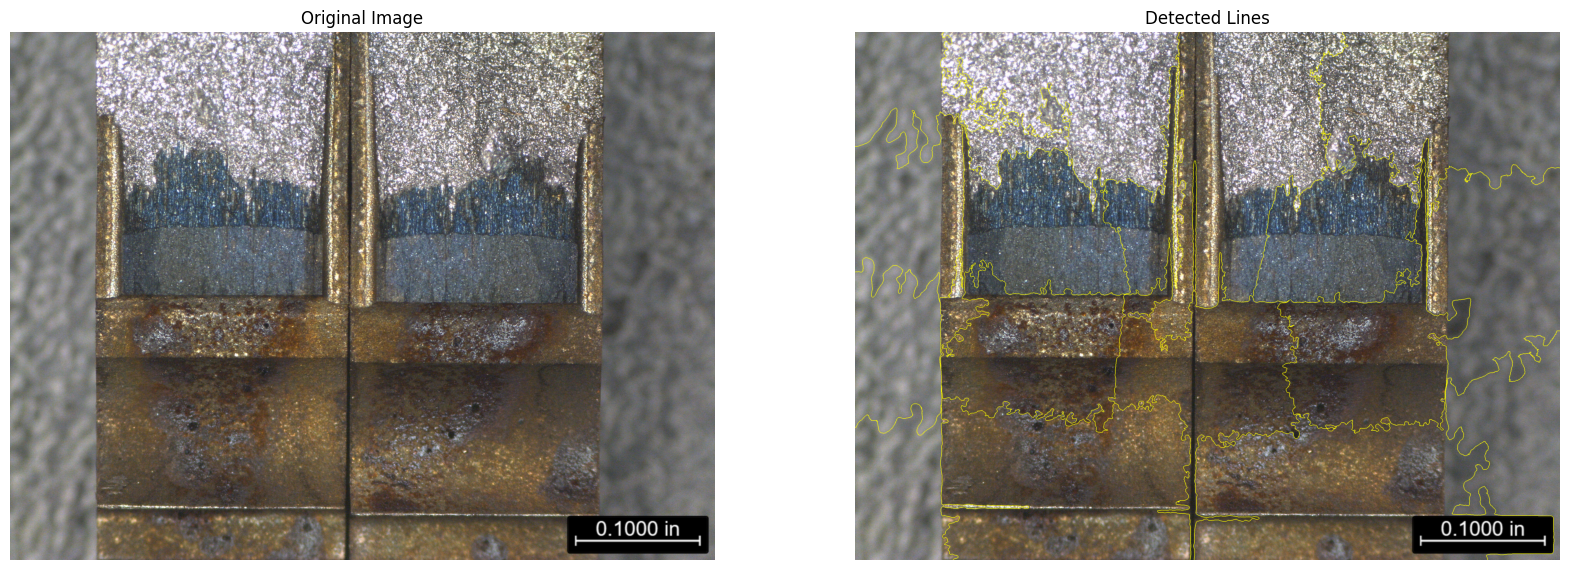

In [52]:
from skimage.segmentation import slic, mark_boundaries
from skimage import io
from matplotlib import pyplot as plt
import cv2

img_path = "sample.jpg"
img = io.imread(img_path)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
# img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
img_blur = cv2.bilateralFilter(img_gray, 15, 72, 72)
img_segments = slic(img_blur, n_segments=18, compactness=0.12, channel_axis=None)

# Plot
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(img, img_segments, mode='thick'))
plt.title('Detected Lines')
plt.axis('off')
plt.show()